# Visualizing International Football Tournaments
### Check out the [Live Interactive Dashboard](https://international-football-dashboard.streamlit.app) I created using the analysis done in this jupyter notebook

<p align="center">
    <img src="https://images.pexels.com/photos/1884574/pexels-photo-1884574.jpeg" alt="Alt Text">
</p>

***Over the past two decades, the influence of data analytics has been growing in every aspect of our lives: in businesses of every kind, but also in healthcare, media and sports. Until a few years ago, football was thought to be immune from this trend. Now, the early adopters in the major football leagues are thriving thanks to the competitive advantage that investments in data analytics are beginning to provide them: Liverpool, AZ Alkmaar and Brentford are just a few in the fast-growing list of successful case studies. In our view, the clubs that aren’t planning to jump on the analytics bandwagon run the risk of being left behind.***

***Data is applied to football in three key areas: performance analysis, recruitment and strategy. We will be scraping the bottom of the barrel in our analysis which will be carried out with help of basic python and some libraries.This is a good place to start off with before moving onto the more complicated analysis.***

We obtained our [*dataset*](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017) from [*Kaggle*](https://www.kaggle.com/). This dataset contains data of international football matches that have been played since the year 1872 up till the present. The data has been split into two csv files:

- results.csv - results of all international matches that have been played till date
- shootouts.csv - results of all shootouts that have been played till date
- goalscorers.csv - goalscorers from all international matches that have been played till date

We will be using the following libraries in Python to carry out our analysis : 
- **Numpy** : it is used to perform a wide variety of mathematical operations on arrays
- **Pandas** : it is built off of Numpy and is used for data analysis and associated manipulation of tabular data in Dataframes
- **Matplotlib** : it is a comprehensive library for creating static, animated, and interactive visualisations in Python
- **Seaborn** : it is built on top of Matplotlib and is used for making even more dynamic and statistical graphs in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# reading the CSV files

results_df = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/results.csv')
shootouts_df = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/shootouts.csv')
goalscorers_df = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/goalscorers.csv')

Let us see some sample data from these dataframes that we just created and get an idea of the data at hand

In [3]:
results_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
46284,2024-02-07,Ivory Coast,DR Congo,1,0,African Cup of Nations,Ebimpé,Ivory Coast,False
46285,2024-02-07,Nigeria,South Africa,1,1,African Cup of Nations,Bouaké,Ivory Coast,True
46286,2024-02-10,Qatar,Jordan,3,1,AFC Asian Cup,Lusail,Qatar,False
46287,2024-02-10,South Africa,DR Congo,0,0,African Cup of Nations,Abidjan,Ivory Coast,True


In [4]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46289 entries, 0 to 46288
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        46289 non-null  object
 1   home_team   46289 non-null  object
 2   away_team   46289 non-null  object
 3   home_score  46289 non-null  int64 
 4   away_score  46289 non-null  int64 
 5   tournament  46289 non-null  object
 6   city        46289 non-null  object
 7   country     46289 non-null  object
 8   neutral     46289 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB


In [5]:
shootouts_df

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN
...,...,...,...,...,...
594,2024-01-30,Saudi Arabia,South Korea,South Korea,Saudi Arabia
595,2024-01-31,Iran,Syria,Iran,Iran
596,2024-02-03,Cape Verde,South Africa,South Africa,Cape Verde
597,2024-02-03,Qatar,Uzbekistan,Qatar,Uzbekistan


In [6]:
shootouts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           599 non-null    object
 1   home_team      599 non-null    object
 2   away_team      599 non-null    object
 3   winner         599 non-null    object
 4   first_shooter  204 non-null    object
dtypes: object(5)
memory usage: 23.5+ KB


In [7]:
goalscorers_df

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
44105,2024-02-10,Qatar,Jordan,Qatar,Akram Afif,73.0,False,True
44106,2024-02-10,Qatar,Jordan,Qatar,Akram Afif,90.0,False,True
44107,2024-02-11,Ivory Coast,Nigeria,Nigeria,William Troost-Ekong,38.0,False,False
44108,2024-02-11,Ivory Coast,Nigeria,Ivory Coast,Franck Kessié,62.0,False,False


In [8]:
goalscorers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44110 entries, 0 to 44109
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44110 non-null  object 
 1   home_team  44110 non-null  object 
 2   away_team  44110 non-null  object 
 3   team       44110 non-null  object 
 4   scorer     44060 non-null  object 
 5   minute     43847 non-null  float64
 6   own_goal   44108 non-null  object 
 7   penalty    44108 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


Loosk like goalscorers_df has some null values. Not to worry, we shall deal with it in the next section.

# Data Preparation and Cleaning

***Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data. Having clean data will ultimately increase overall productivity and allow for the highest quality information in your decision-making.***

Let us add a new column in the shootouts dataframe which will come in handy post-merging. This column will tell us if the match was extended for a penalty shootout or not

In [9]:
shootouts_df['shootout'] = True

Now let us merge both the dataframes to combine shooutout results. This way we do not have to hop between two dataframes again and again as all data is in one dataframe.

In [10]:
rs = pd.merge(results_df, shootouts_df, how = 'outer', on = ['date', 'home_team', 'away_team'])

In [11]:
rs

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,shootout
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,NaN,NaN,NaN
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,NaN,NaN,NaN
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
46285,2024-02-07,Nigeria,South Africa,1.0,1.0,African Cup of Nations,Bouaké,Ivory Coast,True,Nigeria,Nigeria,True
46286,2024-02-07,Qatar,Iran,3.0,2.0,AFC Asian Cup,Doha,Qatar,False,NaN,NaN,NaN
46287,2024-02-10,Qatar,Jordan,3.0,1.0,AFC Asian Cup,Lusail,Qatar,False,NaN,NaN,NaN
46288,2024-02-10,South Africa,DR Congo,0.0,0.0,African Cup of Nations,Abidjan,Ivory Coast,True,NaN,NaN,NaN


Our data looks good but now it looks like we have some null values that need to be addressed.

On top of that we also seem to have a row with a lot of incomplete data. It would be bast for us to drop the that row (last row) in the dataframe as it seems to be an outlier and won't have any impact on our analysis.

In [12]:
rs.dropna(subset=['tournament'], inplace=True)

Let us rename the columns for consistency

In [13]:
rs.rename(columns = {'date':'Date',
                     'home_team':'Home Team',
                     'away_team':'Away Team',
                     'home_score':'Home Score',
                     'away_score':'Away Score',
                     'tournament':'Tournament',
                     'city':'City',
                     'country':'Country',
                     'neutral':'Neutral Venue',
                     'winner':'Winning Team',
                     'shootout':'Shootout'
                     }, inplace = True)


goalscorers_df.rename(columns = {'date':'Date',
                     'home_team':'Home Team',
                     'away_team':'Away Team',
                     'team':'Scorer Team',
                     'scorer':'Scorer',
                     'minute':'Minute',
                     'own_goal':'Own Goal',
                     'penalty':'Penalty'
                     }, inplace = True)

We are changing date format from 'object' to 'datetime' and then adding an extra column 'Year' for more accurate analysis

In [14]:
# changing date format from 'object' to 'datetime'
rs['Date'] = pd.to_datetime(rs['Date'])

# adding a new column 'year' by splitting the 'date' column
rs['Year'] = pd.DatetimeIndex(rs['Date']).year

#-------------------------------------------------------------------

# changing date format from 'object' to 'datetime'
goalscorers_df['Date'] = pd.to_datetime(goalscorers_df['Date'])

# adding a new column 'year' by splitting the 'date' column
goalscorers_df['Year'] = pd.DatetimeIndex(goalscorers_df['Date']).year

We shall now creating a column that displays the outcome of the match such as who won, lost or drew the game.

In [15]:
# winning team

rs.loc[rs['Home Score'] > rs['Away Score'], 'Winning Team'] = rs['Home Team']
rs.loc[rs['Home Score'] < rs['Away Score'], 'Winning Team'] = rs['Away Team']

# losing team

rs.loc[rs['Home Team']== rs['Winning Team'], 'Losing Team'] = rs['Away Team']
rs.loc[rs['Away Team'] == rs['Winning Team'], 'Losing Team'] = rs['Home Team']

Replacing NULL values wherever necessary

In [16]:
# cleaning NaN values

rs['Winning Team'] = rs['Winning Team'].fillna('Draw')
rs['Shootout'] = rs['Shootout'].fillna(False)
rs['Losing Team'] = rs['Losing Team'].fillna('Draw')

/tmp/ipykernel_18/777481397.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rs['Shootout'] = rs['Shootout'].fillna(False)


Correcting error(s) in the outcome of a game that was missing in the extracted data. Even though the game between Morocco and Guinea ended in a draw it resulted in Morocco winning AFCON that year since the format back then did not feature knockout games hence Morocco won the tournament as a result of finishing top of the group. The draw against Guinea gave them that crucial point which meant they were AFCON champions.

In [17]:
rs.loc[rs.Date == '1976-03-14', 'Winning Team'] = 'Morocco'
rs.loc[rs.Date == '1976-03-14', 'Losing Team'] = 'Guinea'

Let us reposition the 'Year' and 'Shootout' columns for better visual understanding

In [18]:
#repositioning columns for better understanding

year_rs = rs.pop('Year')
rs.insert(0, 'Year', year_rs)

shootout = rs.pop('Shootout')
rs.insert(6, 'Shootout', shootout)

year_gs = goalscorers_df.pop('Year')
goalscorers_df.insert(0, 'Year', year_gs)

Let us merge the goalscorers and the results x shootouts dataframes in order to get as much relevant data as possible for the analysis

In [19]:
gs = pd.merge(goalscorers_df, rs, how = 'inner', on = ['Year', 'Date', 'Home Team', 'Away Team'])

We noticed earlier that the 'Scorer' and the 'Minute columns in the goalscorers dataframe had some null values. Let us look a little deeper into that and see what we can do 

In [20]:
gs['Scorer'].isna().value_counts()

Scorer
False    44060
True        50
Name: count, dtype: int64

In [21]:
gs['Minute'].isna().value_counts()

Minute
False    43847
True       263
Name: count, dtype: int64

Let's see which tournaments these null values are a part of

In [22]:
gs[gs.isnull().any(axis=1)]['Tournament'].value_counts()

Tournament
FIFA World Cup qualification           22717
UEFA Euro qualification                 7954
FIFA World Cup                          2658
Copa América                            2621
African Cup of Nations                  1850
UEFA Nations League                     1183
AFC Asian Cup                           1087
Gold Cup                                1071
UEFA Euro                                791
Oceania Nations Cup                      534
CONCACAF Championship                    450
Confederations Cup                       415
Olympic Games                            224
Baltic Cup                               223
British Home Championship                 33
NAFC Championship                         10
CONCACAF Championship qualification       10
CONMEBOL–UEFA Cup of Champions             5
Name: count, dtype: int64

Based off of what we have seen, it won't do us much harm if we were to drop these rows containing null values. Let us go ahead and do that.

In [23]:
gs.dropna(subset=['Minute'], inplace=True)

In [24]:
gs

,Year,Date,Home Team,Away Team,Scorer Team,Scorer,Minute,Own Goal,Penalty,Home Score,Away Score,Shootout,Tournament,City,Country,Neutral Venue,Winning Team,first_shooter,Losing Team
0,1916,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,0.0,4.0,False,Copa América,Buenos Aires,Argentina,True,Uruguay,NaN,Chile
1,1916,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,0.0,4.0,False,Copa América,Buenos Aires,Argentina,True,Uruguay,NaN,Chile
2,1916,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,0.0,4.0,False,Copa América,Buenos Aires,Argentina,True,Uruguay,NaN,Chile
3,1916,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,0.0,4.0,False,Copa América,Buenos Aires,Argentina,True,Uruguay,NaN,Chile
4,1916,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,6.0,1.0,False,Copa América,Buenos Aires,Argentina,False,Argentina,NaN,Chile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44105,2024,2024-02-10,Qatar,Jordan,Qatar,Akram Afif,73.0,False,True,3.0,1.0,False,AFC Asian Cup,Lusail,Qatar,False,Qatar,NaN,Jordan
44106,2024,2024-02-10,Qatar,Jordan,Qatar,Akram Afif,90.0,False,True,3.0,1.0,False,AFC Asian Cup,Lusail,Qatar,False,Qatar,NaN,Jordan
44107,2024,2024-02-11,Ivory Coast,Nigeria,Nigeria,William Troost-Ekong,38.0,False,False,2.0,1.0,False,African Cup of Nations,Ebimpé,Ivory Coast,False,Ivory Coast,NaN,Nigeria
44108,2024,2024-02-11,Ivory Coast,Nigeria,Ivory Coast,Franck Kessié,62.0,False,False,2.0,1.0,False,African Cup of Nations,Ebimpé,Ivory Coast,False,Ivory Coast,NaN,Nigeria


In [25]:
rs

,Year,Date,Home Team,Away Team,Home Score,Away Score,Shootout,Tournament,City,Country,Neutral Venue,Winning Team,first_shooter,Losing Team
0,1872,1872-11-30,Scotland,England,0.0,0.0,False,Friendly,Glasgow,Scotland,False,Draw,NaN,Draw
1,1873,1873-03-08,England,Scotland,4.0,2.0,False,Friendly,London,England,False,England,NaN,Scotland
2,1874,1874-03-07,Scotland,England,2.0,1.0,False,Friendly,Glasgow,Scotland,False,Scotland,NaN,England
3,1875,1875-03-06,England,Scotland,2.0,2.0,False,Friendly,London,England,False,Draw,NaN,Draw
4,1876,1876-03-04,Scotland,England,3.0,0.0,False,Friendly,Glasgow,Scotland,False,Scotland,NaN,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46285,2024,2024-02-07,Nigeria,South Africa,1.0,1.0,True,African Cup of Nations,Bouaké,Ivory Coast,True,Nigeria,Nigeria,South Africa
46286,2024,2024-02-07,Qatar,Iran,3.0,2.0,False,AFC Asian Cup,Doha,Qatar,False,Qatar,NaN,Iran
46287,2024,2024-02-10,Qatar,Jordan,3.0,1.0,False,AFC Asian Cup,Lusail,Qatar,False,Qatar,NaN,Jordan
46288,2024,2024-02-10,South Africa,DR Congo,0.0,0.0,False,African Cup of Nations,Abidjan,Ivory Coast,True,Draw,NaN,Draw


For the most part we cleaned and processed our data. We can now begin analyzing and answering the questions we had set out to answer.

# Exploratory Analysis and  Visualization

***We can define exploratory data analysis as the essential data investigation process before the formal analysis to spot patterns and anomalies, discover trends, and test hypotheses with summary statistics and visualizations. It gives an idea about the data we will be digging deep into while analyzing.***

- **What is the highest scoring match in the history of football?**

In [26]:
goals_scored = rs['Home Score'] + rs['Away Score']
rs.iloc[goals_scored.idxmax()].to_frame()

,25010
Year,2001
Date,2001-04-11 00:00:00
Home Team,Australia
Away Team,American Samoa
Home Score,31.0
Away Score,0.0
Shootout,False
Tournament,FIFA World Cup qualification
City,Coffs Harbour
Country,Australia


The highest scoring match in the history of football was between Australia and Samoa which was played during a FIFA World Cup qualification game back in 2001. The final score was 31-0 in favour of Australia.

- **Which team has scored the most number of goals in a single match?**

In [27]:
homescore_max = rs['Home Score'].max()
awayscore_max = rs['Away Score'].max()

if homescore_max > awayscore_max :
    score_max_index = rs['Home Score'].idxmax()
else :
    score_max_index = rs['Away Score'].idxmax()
    
rs.iloc[score_max_index].to_frame()

,25010
Year,2001
Date,2001-04-11 00:00:00
Home Team,Australia
Away Team,American Samoa
Home Score,31.0
Away Score,0.0
Shootout,False
Tournament,FIFA World Cup qualification
City,Coffs Harbour
Country,Australia


The most number of goals scored by a single team in a one-off match was Australia where they thrashed Samoa 31-0 in FIFA World Cup qualification game. This also happend to be the highest scoring game in the history of football and both the records remains untouched till date.

**Now let us analyze some trends from the following tournaments :**
- ***FIFA World Cup***
- ***Copa América***
- ***African Cup of Nations***
- ***UEFA Euro***
- ***AFC Asian Cup***

First, we create seperates dataframes for each tournament

In [28]:
#creating dataframes for major tournaments

world_cup = rs.loc[rs['Tournament'] == 'FIFA World Cup']
copa_america = rs.loc[rs['Tournament'] == 'Copa América']
afcon = rs.loc[rs['Tournament'] == 'African Cup of Nations']
euros = rs.loc[rs['Tournament'] == 'UEFA Euro']
asian_cup = rs.loc[rs['Tournament'] == 'AFC Asian Cup']

- **How have the number of goals scored across various editions varied?**

In [29]:
# grouping dataframes with respect to the year and goals scored

world_cup_goals = world_cup.groupby('Year')[['Home Score', 'Away Score']].sum()
copa_america_goals = copa_america.groupby('Year')[['Home Score', 'Away Score']].sum()
afcon_goals = afcon.groupby('Year')[['Home Score', 'Away Score']].sum()
euros_goals = euros.groupby('Year')[['Home Score', 'Away Score']].sum()
asian_cup_goals = asian_cup.groupby('Year')[['Home Score', 'Away Score']].sum()

world_cup_goals['Goals Scored'] = world_cup_goals['Home Score'] + world_cup_goals['Away Score']
copa_america_goals['Goals Scored'] = copa_america_goals['Home Score'] + copa_america_goals['Away Score']
afcon_goals['Goals Scored'] = afcon_goals['Home Score'] + afcon_goals['Away Score']
euros_goals['Goals Scored'] = euros_goals['Home Score'] + euros_goals['Away Score']
asian_cup_goals['Goals Scored'] = asian_cup_goals['Home Score'] + asian_cup_goals['Away Score']

In [30]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Create a single plot
fig = go.Figure()

# Add line plots to the single plot
fig.add_trace(go.Scatter(x=world_cup_goals.index, y=world_cup_goals['Goals Scored'], mode='lines+markers', name='FIFA World Cup'))
fig.add_trace(go.Scatter(x=copa_america_goals.index, y=copa_america_goals['Goals Scored'], mode='lines+markers', name='Copa América'))
fig.add_trace(go.Scatter(x=afcon_goals.index, y=afcon_goals['Goals Scored'], mode='lines+markers', name='African Cup of Nations'))
fig.add_trace(go.Scatter(x=euros_goals.index, y=euros_goals['Goals Scored'], mode='lines+markers', name='UEFA Euro'))
fig.add_trace(go.Scatter(x=asian_cup_goals.index, y=asian_cup_goals['Goals Scored'], mode='lines+markers', name='AFC Asian Cup'))

# Update layout settings
fig.update_layout(title='Goals Scored in Different Tournaments', xaxis_title='Time', yaxis_title='Goals Scored')

# Show the plot
pyo.iplot(fig)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

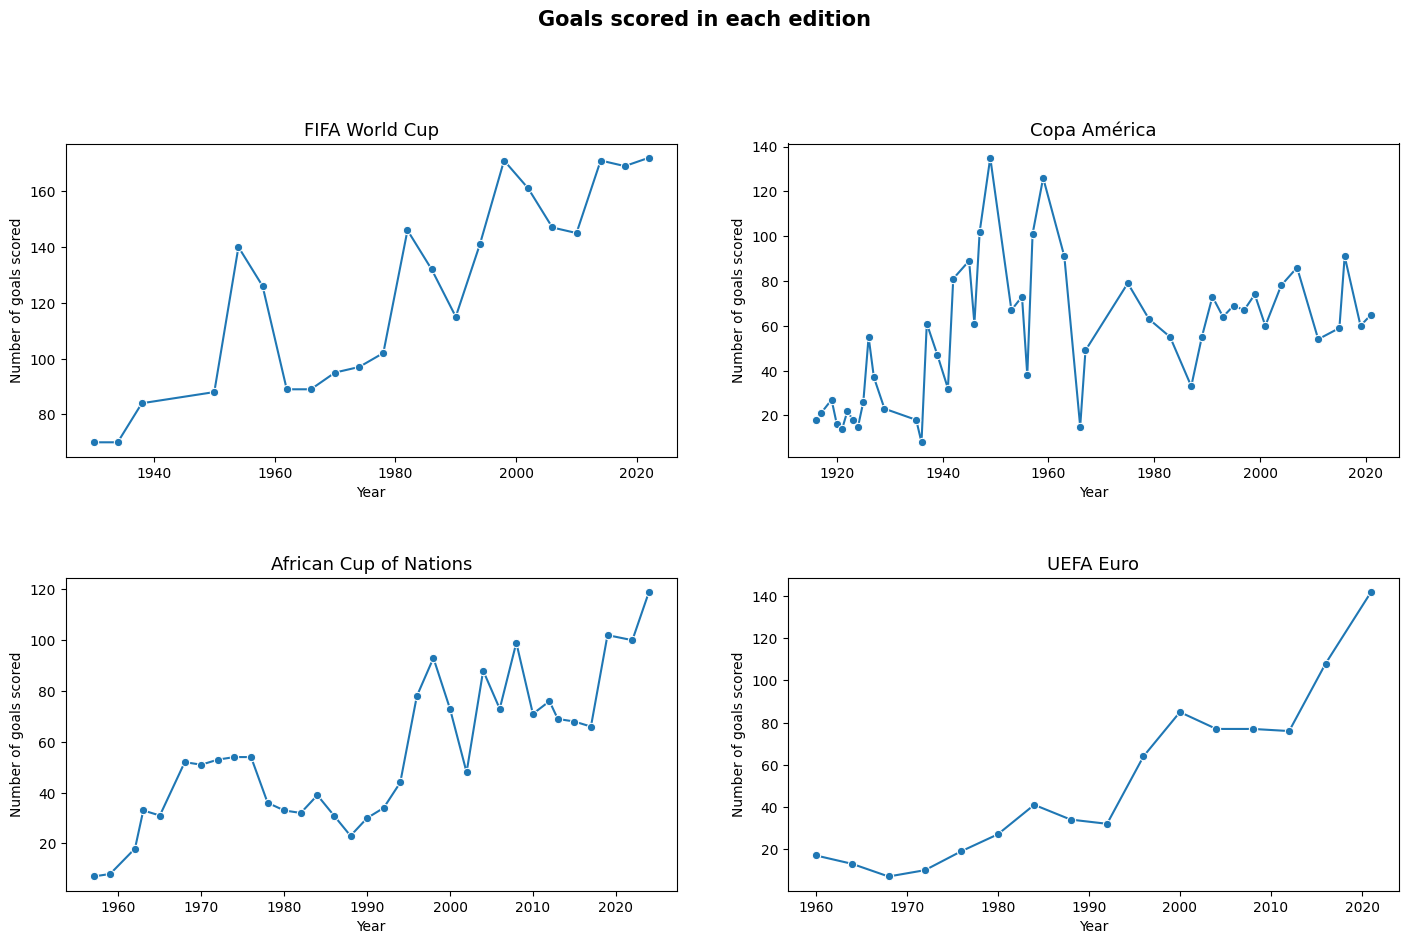

In [31]:
fig_goals, axs = plt.subplots(2,2, figsize=(15,10))

sns.lineplot(data = world_cup_goals, x = world_cup_goals.index, y = 'Goals Scored', ax = axs[0,0], marker='o')
sns.lineplot(data = copa_america_goals, x = copa_america_goals.index, y = 'Goals Scored', ax = axs[0,1], marker='o')
sns.lineplot(data = afcon_goals, x = afcon_goals.index, y = 'Goals Scored', ax = axs[1,0], marker='o')
sns.lineplot(data = euros_goals, x = euros_goals.index, y = 'Goals Scored', ax = axs[1,1], marker='o')

axs[0,0].set_xlabel('Year', fontsize = 10)
axs[0,1].set_xlabel('Year', fontsize = 10)
axs[1,0].set_xlabel('Year', fontsize = 10)
axs[1,1].set_xlabel('Year', fontsize = 10)

axs[0,0].set_ylabel('Number of goals scored', fontsize = 10)
axs[0,1].set_ylabel('Number of goals scored', fontsize = 10)
axs[1,0].set_ylabel('Number of goals scored', fontsize = 10)
axs[1,1].set_ylabel('Number of goals scored', fontsize = 10)

axs[0,0].set_title('FIFA World Cup', fontsize = 13)
axs[0,1].set_title('Copa América', fontsize = 13)
axs[1,0].set_title('African Cup of Nations', fontsize = 13)
axs[1,1].set_title('UEFA Euro', fontsize = 13)

plt.suptitle('Goals scored in each edition', fontweight ='bold', fontsize = 15)

fig_goals.tight_layout(pad = 4)

# setting face color/bg of the plot to white
fig_goals.set_facecolor('white')

#fig_goals.savefig('Goals scored in each edition.png')

We can see that there isn't a continuous growth/decline in the number of goals scored across different editions. This is mainly due to the evolution of formations over time and different styles of play being adopted.

- **How many teams have won the respective tournaments?**

In [32]:
# creating dataframes for finals of the respective tournaments

world_cup_groupby = world_cup.groupby('Year')
world_cup_final = world_cup_groupby.last()

copa_america_groupby = copa_america.groupby('Year')
copa_america_final = copa_america_groupby.last()

afcon_groupby = afcon.groupby('Year')
afcon_final = afcon_groupby.last()

euros_groupby = euros.groupby('Year')
euros_final = euros_groupby.last()

asian_cup_groupby = asian_cup.groupby('Year')
asian_cup_final = asian_cup_groupby.last()

In [33]:
# resolving certain faults in the Finals data

indexNames = copa_america_final[copa_america_final['Winning Team'] == 'Draw'].index
copa_america_final.drop(indexNames, inplace = True)

In [34]:
# creating dataframes to identify the winners and how many times they have won the tournament

"""

world_cup_champions = world_cup_final['Winning Team'].value_counts().sort_index()
copa_america_champions = copa_america_final['Winning Team'].value_counts().sort_index()
afcon_champions = afcon_final['Winning Team'].value_counts().sort_index()
euros_champions = euros_final['Winning Team'].value_counts().sort_index()


world_cup_champions_count = world_cup_champions.array
world_cup_champions_teamnames = world_cup_champions.index.array

copa_america_champions_count = copa_america_champions.array
copa_america_champions_teamnames = copa_america_champions.index.array

afcon_champions_count = afcon_champions.array
afcon_champions_teamnames = afcon_champions.index.array

euros_champions_count = euros_champions.array
euros_champions_teamnames = euros_champions.index.array

"""

world_cup_champions = pd.DataFrame(world_cup_final['Winning Team'].value_counts().sort_index())
copa_america_champions = pd.DataFrame(copa_america_final['Winning Team'].value_counts().sort_index())
afcon_champions = pd.DataFrame(afcon_final['Winning Team'].value_counts().sort_index())
euros_champions = pd.DataFrame(euros_final['Winning Team'].value_counts().sort_index())
asian_cup_champions = pd.DataFrame(asian_cup_final['Winning Team'].value_counts().sort_index())

# Resetting index
world_cup_champions.reset_index(drop=False, inplace=True)
copa_america_champions.reset_index(drop=False, inplace=True)
afcon_champions.reset_index(drop=False, inplace=True)
euros_champions.reset_index(drop=False, inplace=True)
asian_cup_champions.reset_index(drop=False, inplace=True)

# Renaming columns
world_cup_champions.rename(columns={'Winning Team': 'Winner', 'count': 'Trophies won overall'}, inplace=True)
copa_america_champions.rename(columns={'Winning Team': 'Winner', 'count': 'Trophies won overall'}, inplace=True)
afcon_champions.rename(columns={'Winning Team': 'Winner', 'count': 'Trophies won overall'}, inplace=True)
euros_champions.rename(columns={'Winning Team': 'Winner', 'count': 'Trophies won overall'}, inplace=True)
asian_cup_champions.rename(columns={'Winning Team': 'Winner', 'count': 'Trophies won overall'}, inplace=True)

Below is an example of the world_cup_champions dataframe that we have made for creating visaulizations

In [35]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Sort dataframes by trophies won in descending order
world_cup_champions_sorted = world_cup_champions.sort_values(by='Trophies won overall', ascending=False)
copa_america_champions_sorted = copa_america_champions.sort_values(by='Trophies won overall', ascending=False)
afcon_champions_sorted = afcon_champions.sort_values(by='Trophies won overall', ascending=False)
euros_champions_sorted = euros_champions.sort_values(by='Trophies won overall', ascending=False)
asian_cup_champions_sorted = asian_cup_champions.sort_values(by='Trophies won overall', ascending=False)

# Create a single plot with horizontal bar subplots
fig_trophies = go.Figure()

# Add horizontal bar plots to the single plot
fig_trophies.add_trace(go.Bar(y=world_cup_champions_sorted['Winner'], x=world_cup_champions_sorted['Trophies won overall'], orientation='h', name='FIFA World Cup'))
fig_trophies.add_trace(go.Bar(y=copa_america_champions_sorted['Winner'], x=copa_america_champions_sorted['Trophies won overall'], orientation='h', name='Copa América'))
fig_trophies.add_trace(go.Bar(y=afcon_champions_sorted['Winner'], x=afcon_champions_sorted['Trophies won overall'], orientation='h', name='African Cup of Nations'))
fig_trophies.add_trace(go.Bar(y=euros_champions_sorted['Winner'], x=euros_champions_sorted['Trophies won overall'], orientation='h', name='UEFA Euro'))
fig_trophies.add_trace(go.Bar(y=asian_cup_champions_sorted['Winner'], x=asian_cup_champions_sorted['Trophies won overall'], orientation='h', name='AFC Asian Cup'))

# Update layout settings
fig_trophies.update_layout(title='Most decorated countries', barmode='stack')

# Set a taller height for the plot
fig_trophies.update_layout(height=800)

# Show the plot
pyo.iplot(fig_trophies)

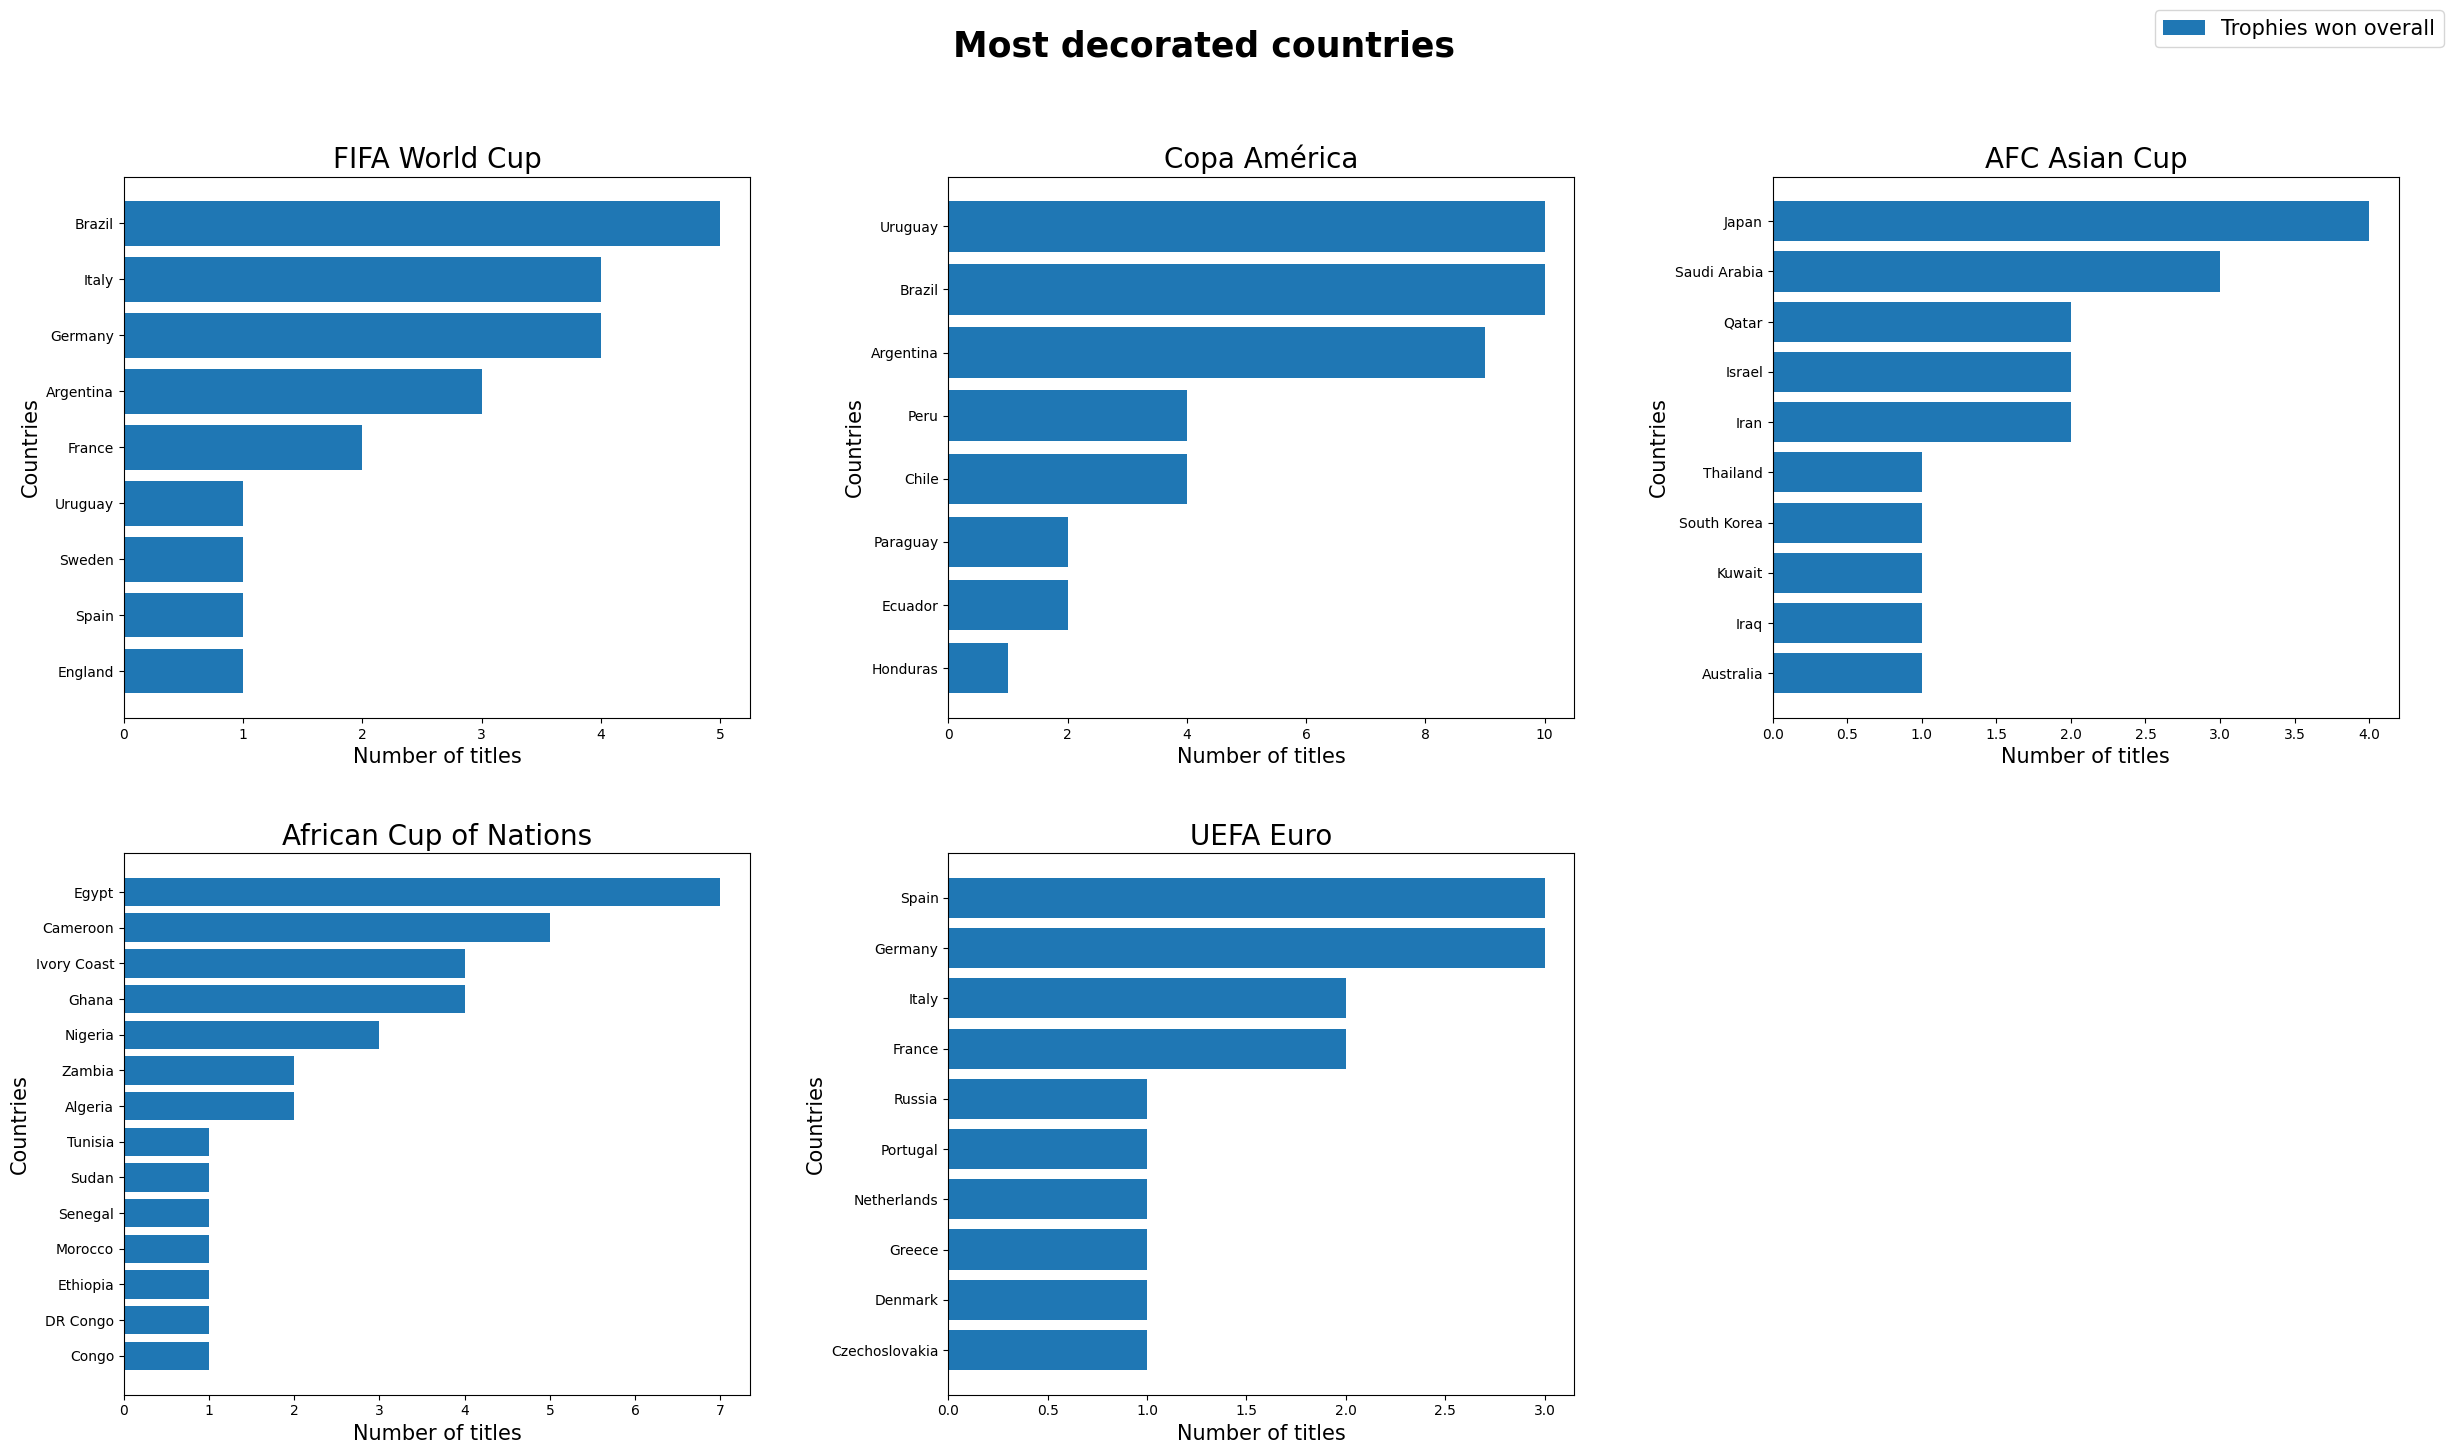

In [36]:
fig_trophies, axs = plt.subplots(2, 3, figsize=(25, 15))

# Sort DataFrames in ascending order
world_cup_champions_sorted = world_cup_champions.sort_values(by='Trophies won overall', ascending=True)
copa_america_champions_sorted = copa_america_champions.sort_values(by='Trophies won overall', ascending=True)
asian_cup_champions_sorted = asian_cup_champions.sort_values(by='Trophies won overall', ascending=True)
afcon_champions_sorted = afcon_champions.sort_values(by='Trophies won overall', ascending=True)
euros_champions_sorted = euros_champions.sort_values(by='Trophies won overall', ascending=True)

axs[0, 0].barh(world_cup_champions_sorted['Winner'], world_cup_champions_sorted['Trophies won overall'])
axs[0, 1].barh(copa_america_champions_sorted['Winner'], copa_america_champions_sorted['Trophies won overall'])
axs[0, 2].barh(asian_cup_champions_sorted['Winner'], asian_cup_champions_sorted['Trophies won overall'])
axs[1, 0].barh(afcon_champions_sorted['Winner'], afcon_champions_sorted['Trophies won overall'])
axs[1, 1].barh(euros_champions_sorted['Winner'], euros_champions_sorted['Trophies won overall'])
axs[1,2].remove()  # This will remove the subplot in the second row and third column

# Explicitly set the titles for each subplot
axs[0, 0].set_title('FIFA World Cup', fontsize=20)
axs[0, 1].set_title('Copa América', fontsize=20)
axs[0, 2].set_title('AFC Asian Cup', fontsize=20)
axs[1, 0].set_title('African Cup of Nations', fontsize=20)
axs[1, 1].set_title('UEFA Euro', fontsize=20)

for ax in axs.flatten():
    ax.set_ylabel('Countries', fontsize=15)
    ax.set_xlabel('Number of titles', fontsize=15)

# Create a common legend to the right of the subplots
common_legend = fig_trophies.legend(['Trophies won overall'], loc='upper right', fontsize=15)

plt.suptitle('Most decorated countries', fontweight='bold', fontsize=25)

fig_trophies.tight_layout(pad=4)

# setting face color/bg of the plot to white
fig_trophies.set_facecolor('white')

# fig_trophies.savefig('Most decorated countries.png')

**Brazil**, **Germany** and **Italy** have dominated both the International and the Continental tournaments, whilst countries such as **Egypt**, **Cameroon**, **Ghana**, **Ivory Coast**, **Nigeria**, **Spain**, **Argentina** and **Uruguay** have enjoyed quite a lot of Continental success.

Now that we have visualized the winners from the top 4 major international tournaments, let us go one step further and see how many of these champions were victors on home soil.

- **How many of these champions were hosts when they won the respective tournaments?**

In [37]:
# creating dataframes to identify the winners who also happend to be hosts and how many times they have won the tournament

world_cup_host_champions = world_cup_final[world_cup_final['Winning Team'] == world_cup_final['Country']]
copa_america_host_champions = copa_america_final[copa_america_final['Winning Team'] == copa_america_final['Country']]
afcon_host_champions = afcon_final[afcon_final['Winning Team'] == afcon_final['Country']]
euros_host_champions = euros_final[euros_final['Winning Team'] == euros_final['Country']]
asian_cup_host_champions = asian_cup_final[asian_cup_final['Winning Team'] == asian_cup_final['Country']]

world_cup_host_champions = pd.DataFrame(world_cup_host_champions['Winning Team'].value_counts().sort_index())
copa_america_host_champions = pd.DataFrame(copa_america_host_champions['Winning Team'].value_counts().sort_index())
afcon_host_champions = pd.DataFrame(afcon_host_champions['Winning Team'].value_counts().sort_index())
euros_host_champions = pd.DataFrame(euros_host_champions['Winning Team'].value_counts().sort_index())
asian_cup_host_champions = pd.DataFrame(asian_cup_host_champions['Winning Team'].value_counts().sort_index())

# Resetting index
world_cup_host_champions.reset_index(drop=False, inplace=True)
copa_america_host_champions.reset_index(drop=False, inplace=True)
afcon_host_champions.reset_index(drop=False, inplace=True)
euros_host_champions.reset_index(drop=False, inplace=True)
asian_cup_host_champions.reset_index(drop=False, inplace=True)

# Renaming columns
world_cup_host_champions.rename(columns={'Winning Team': 'Winner', 'count': 'Trophies won as host'}, inplace=True)
copa_america_host_champions.rename(columns={'Winning Team': 'Winner', 'count': 'Trophies won as host'}, inplace=True)
afcon_host_champions.rename(columns={'Winning Team': 'Winner', 'count': 'Trophies won as host'}, inplace=True)
euros_host_champions.rename(columns={'Winning Team': 'Winner', 'count': 'Trophies won as host'}, inplace=True)
asian_cup_host_champions.rename(columns={'Winning Team': 'Winner', 'count': 'Trophies won as host'}, inplace=True)

To make things simpler as we go further into our analysis, we shall merge both the dataframes, i.e. the merged dataframe will now contain the number of trophies a country has won and also how many of them were won while they were hosts.

In [38]:
# merging the champions and the host_champions dataframes

world_cup_champions_df = pd.merge(world_cup_champions, world_cup_host_champions, how = 'outer', on = ['Winner'])
copa_america_champions_df = pd.merge(copa_america_champions, copa_america_host_champions, how = 'outer', on = ['Winner'])
afcon_champions_df = pd.merge(afcon_champions, afcon_host_champions, how = 'outer', on = ['Winner'])
euros_champions_df = pd.merge(euros_champions, euros_host_champions, how = 'outer', on = ['Winner'])
asian_cup_champions_df = pd.merge(asian_cup_champions, asian_cup_host_champions, how='outer', on=['Winner'])

# replacing null values with 0  for the teams that didn't win any tournaments as hosts
world_cup_champions_df.fillna(0, inplace=True)
copa_america_champions_df.fillna(0, inplace=True)
afcon_champions_df.fillna(0, inplace=True)
euros_champions_df.fillna(0, inplace=True)
asian_cup_champions_df.fillna(0, inplace=True)

# changing datatype of 'Trophies won as host' column from float to int
world_cup_champions_df['Trophies won as host'] = world_cup_champions_df['Trophies won as host'].astype(int)
copa_america_champions_df['Trophies won as host'] = copa_america_champions_df['Trophies won as host'].astype(int)
afcon_champions_df['Trophies won as host'] = afcon_champions_df['Trophies won as host'].astype(int)
euros_champions_df['Trophies won as host'] = euros_champions_df['Trophies won as host'].astype(int)
asian_cup_champions_df['Trophies won as host'] = asian_cup_champions_df['Trophies won as host'].astype(int)

In [39]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Create a single plot with horizontal bar subplots
fig_host_trophies = go.Figure()

# Add horizontal bar plots to the single plot
fig_host_trophies.add_trace(go.Bar(y=world_cup_champions_df['Winner'], x=world_cup_champions_df['Trophies won overall'], orientation='h', name='Trophies won overall - World Cup'))
fig_host_trophies.add_trace(go.Bar(y=world_cup_champions_df['Winner'], x=world_cup_champions_df['Trophies won as host'], orientation='h', name='Trophies won as host - World Cup'))
fig_host_trophies.add_trace(go.Bar(y=copa_america_champions_df['Winner'], x=copa_america_champions_df['Trophies won overall'], orientation='h', name='Trophies won overall - Copa America'))
fig_host_trophies.add_trace(go.Bar(y=copa_america_champions_df['Winner'], x=copa_america_champions_df['Trophies won as host'], orientation='h', name='Trophies won as host - Copa America'))
fig_host_trophies.add_trace(go.Bar(y=afcon_champions_df['Winner'], x=afcon_champions_df['Trophies won overall'], orientation='h', name='Trophies won overall - AFCON'))
fig_host_trophies.add_trace(go.Bar(y=afcon_champions_df['Winner'], x=afcon_champions_df['Trophies won as host'], orientation='h', name='Trophies won as host - AFCON'))
fig_host_trophies.add_trace(go.Bar(y=euros_champions_df['Winner'], x=euros_champions_df['Trophies won overall'], orientation='h', name='Trophies won overall - UEFA Euro'))
fig_host_trophies.add_trace(go.Bar(y=euros_champions_df['Winner'], x=euros_champions_df['Trophies won as host'], orientation='h', name='Trophies won as host - UEFA Euro'))
fig_host_trophies.add_trace(go.Bar(y=asian_cup_champions_df['Winner'], x=asian_cup_champions_df['Trophies won overall'], orientation='h', name='Trophies won overall - AFC Asian Cup'))
fig_host_trophies.add_trace(go.Bar(y=asian_cup_champions_df['Winner'], x=asian_cup_champions_df['Trophies won as host'], orientation='h', name='Trophies won as host - AFC Asian Cup'))

# Update layout settings
fig_host_trophies.update_layout(title='Most successful host countries', barmode='group', yaxis_title='Number of Titles')

# Set a taller height for the plot
fig_host_trophies.update_layout(height=1000)

# Show the plot
pyo.iplot(fig_host_trophies)

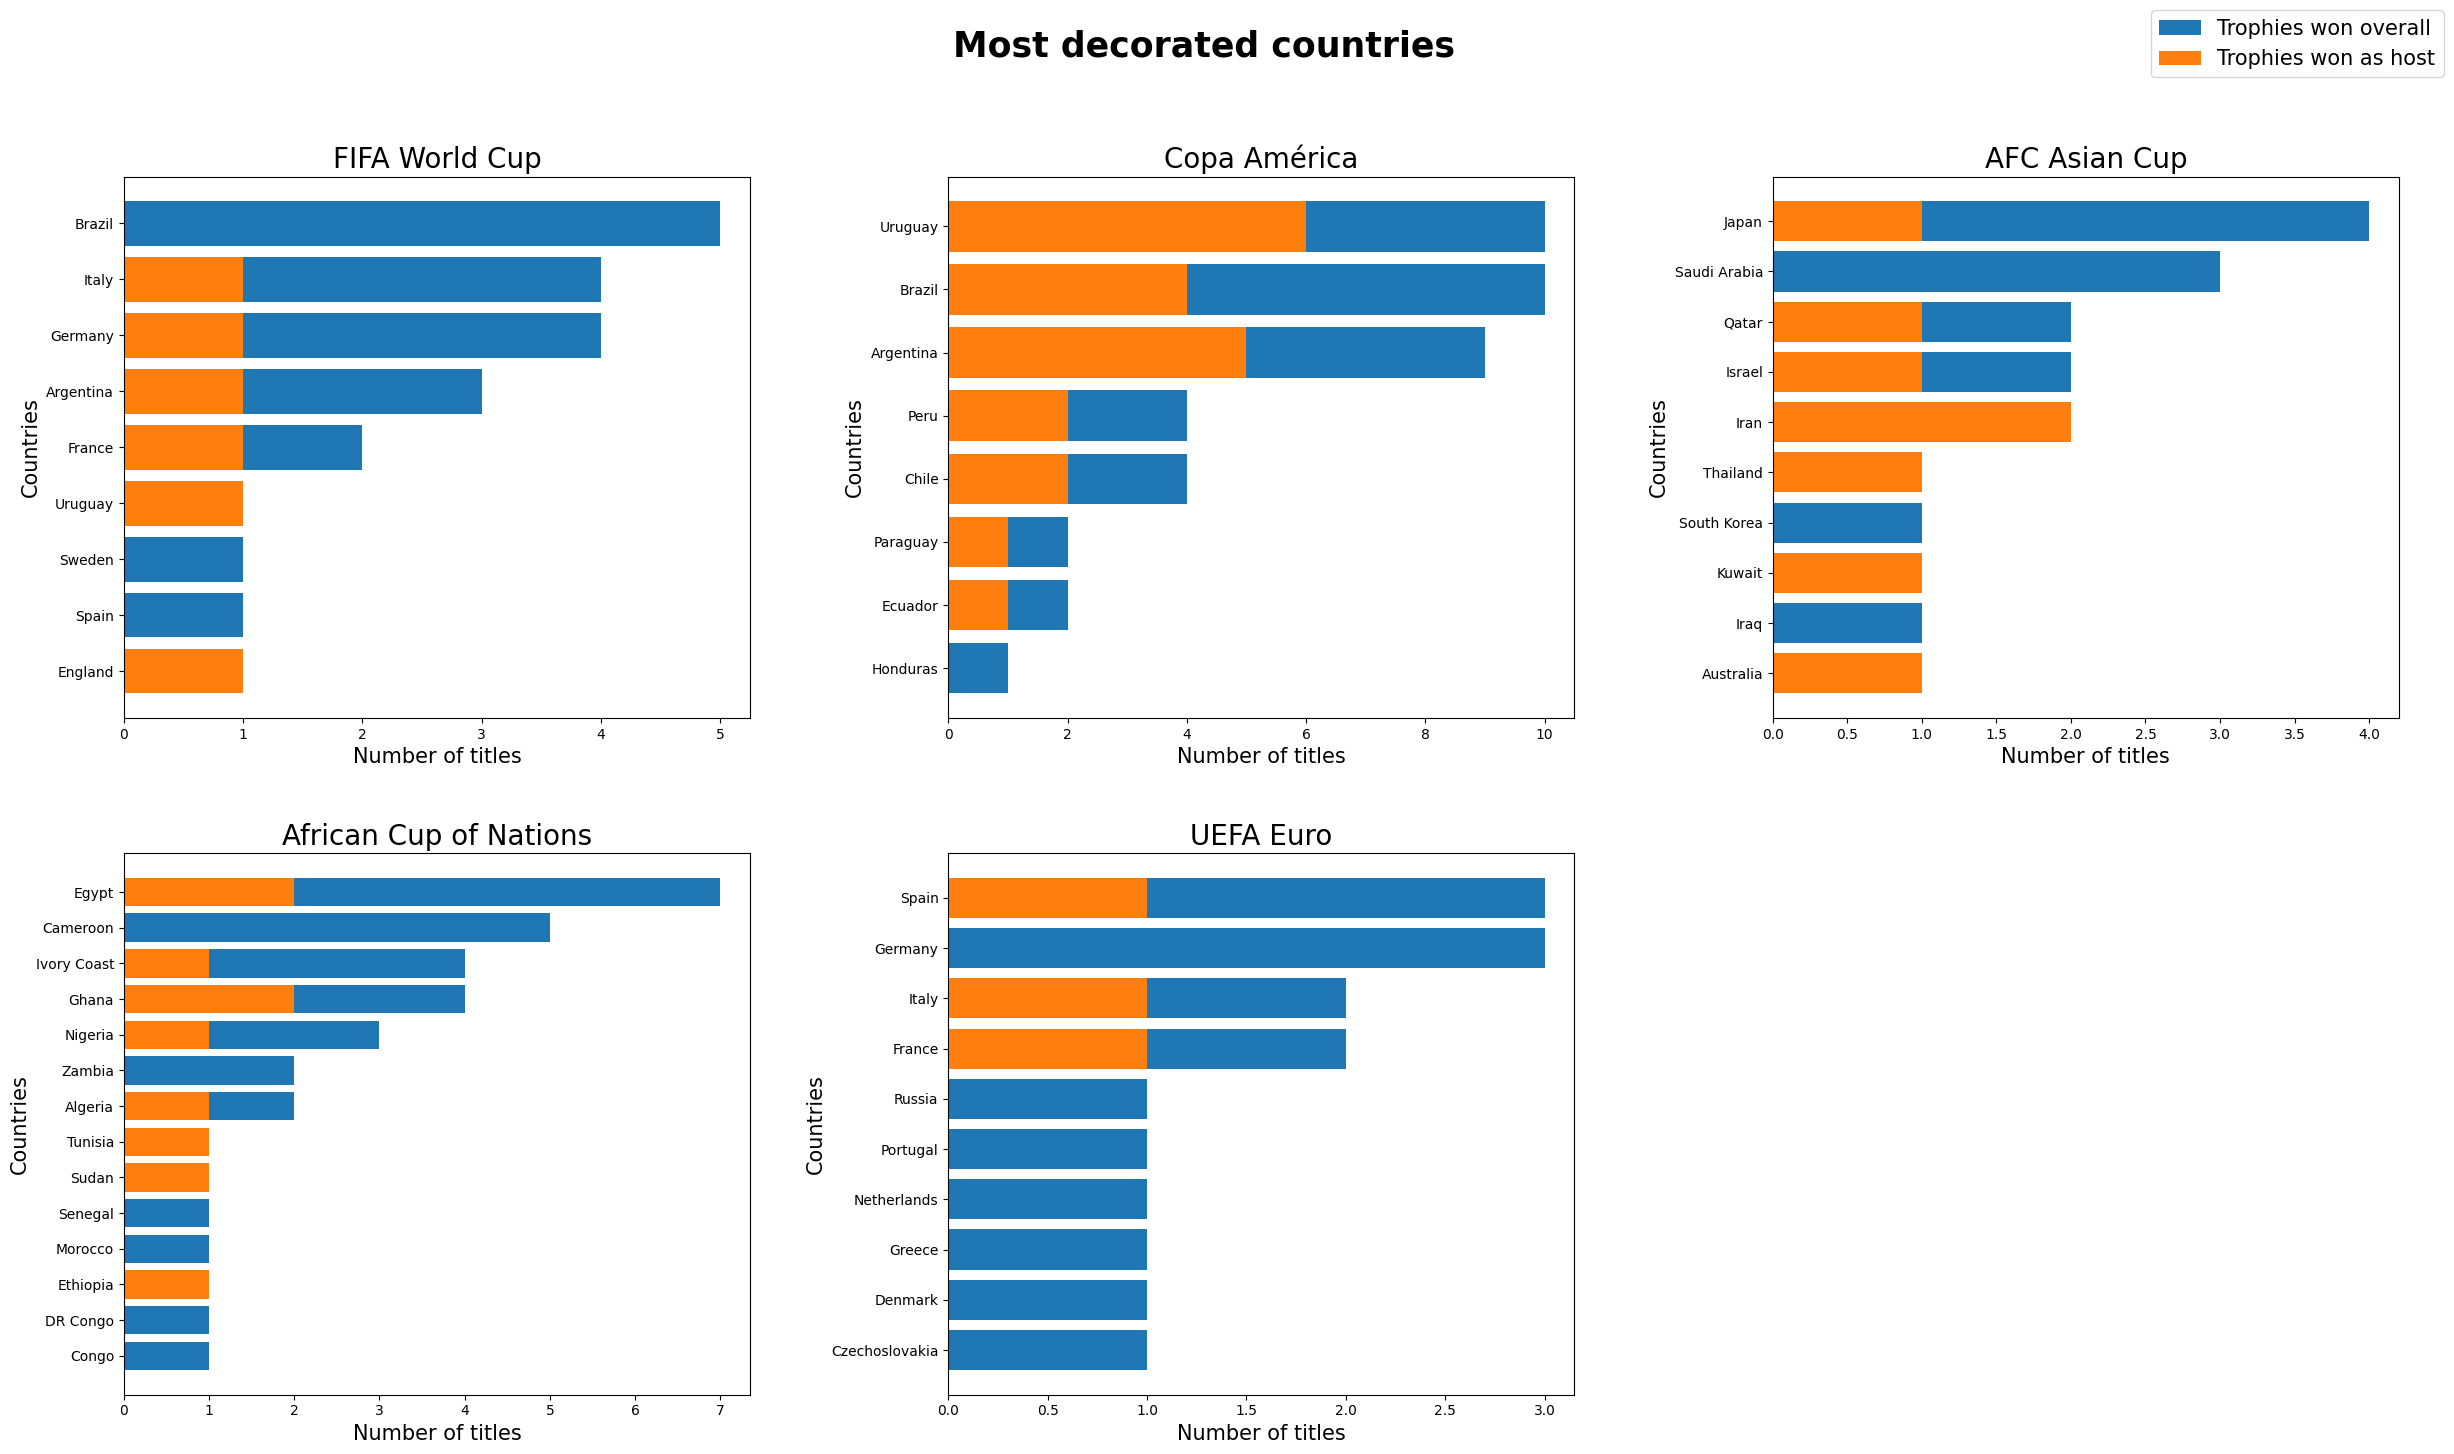

In [40]:
fig_host_trophies, axs = plt.subplots(2, 3, figsize=(25, 15))

# Sort DataFrames in ascending order
world_cup_champions_sorted = world_cup_champions_df.sort_values(by='Trophies won overall', ascending=True)
copa_america_champions_sorted = copa_america_champions_df.sort_values(by='Trophies won overall', ascending=True)
asian_cup_champions_sorted = asian_cup_champions_df.sort_values(by='Trophies won overall', ascending=True)
afcon_champions_sorted = afcon_champions_df.sort_values(by='Trophies won overall', ascending=True)
euros_champions_sorted = euros_champions_df.sort_values(by='Trophies won overall', ascending=True)

axs[0, 0].barh(world_cup_champions_sorted['Winner'], world_cup_champions_sorted['Trophies won overall'])
axs[0, 0].barh(world_cup_champions_sorted['Winner'], world_cup_champions_sorted['Trophies won as host'])
axs[0, 1].barh(copa_america_champions_sorted['Winner'], copa_america_champions_sorted['Trophies won overall'])
axs[0, 1].barh(copa_america_champions_sorted['Winner'], copa_america_champions_sorted['Trophies won as host'])
axs[0, 2].barh(asian_cup_champions_sorted['Winner'], asian_cup_champions_sorted['Trophies won overall'])
axs[0, 2].barh(asian_cup_champions_sorted['Winner'], asian_cup_champions_sorted['Trophies won as host'])
axs[1, 0].barh(afcon_champions_sorted['Winner'], afcon_champions_sorted['Trophies won overall'])
axs[1, 0].barh(afcon_champions_sorted['Winner'], afcon_champions_sorted['Trophies won as host'])
axs[1, 1].barh(euros_champions_sorted['Winner'], euros_champions_sorted['Trophies won overall'])
axs[1, 1].barh(euros_champions_sorted['Winner'], euros_champions_sorted['Trophies won as host'])
axs[1,2].remove()  # This will remove the subplot in the second row and third column

# Explicitly set the titles for each subplot
axs[0, 0].set_title('FIFA World Cup', fontsize=20)
axs[0, 1].set_title('Copa América', fontsize=20)
axs[0, 2].set_title('AFC Asian Cup', fontsize=20)
axs[1, 0].set_title('African Cup of Nations', fontsize=20)
axs[1, 1].set_title('UEFA Euro', fontsize=20)

for ax in axs.flatten():
    ax.set_ylabel('Countries', fontsize=15)
    ax.set_xlabel('Number of titles', fontsize=15)

# Create a common legend to the right of the subplots
fig_host_trophies.legend(['Trophies won overall', 'Trophies won as host'], loc='upper right', fontsize=15)

plt.suptitle('Most decorated countries', fontweight='bold', fontsize=25)

fig_host_trophies.tight_layout(pad=4)

# setting face color/bg of the plot to white
fig_host_trophies.set_facecolor('white')

# fig_host_trophies.savefig('Most successful host countries.png')

There have been a fair few victors who were hosts as well but there seem to be quite a lot that weren't necessaily hosting tournaments which they won, with _Copa América_ being an exception.

Let's get a more specific visualisation as to how often do we see _Host Nations_ come out on top.

**What is the percentage of teams that have won the tournament whilst hosting it?**

In [41]:
# preparing necessary elements to draw a piechart

world_cup_neutral_champions_count = world_cup_champions_df['Trophies won overall'] - world_cup_champions_df['Trophies won as host']
copa_america_neutral_champions_count = copa_america_champions_df['Trophies won overall'] - copa_america_champions_df['Trophies won as host']
asian_cup_neutral_champions_count = asian_cup_champions_df['Trophies won overall'] - asian_cup_champions_df['Trophies won as host']
afcon_neutral_champions_count = afcon_champions_df['Trophies won overall'] - afcon_champions_df['Trophies won as host']
euros_neutral_champions_count = euros_champions_df['Trophies won overall'] - euros_champions_df['Trophies won as host']

world_cup_champions_arr = [sum(world_cup_neutral_champions_count), sum(world_cup_champions_df['Trophies won as host'])]
copa_america_champions_arr = [sum(copa_america_neutral_champions_count), sum(copa_america_champions_df['Trophies won as host'])]
asian_cup_champions_arr = [sum(asian_cup_neutral_champions_count), sum(asian_cup_champions_df['Trophies won as host'])]
afcon_champions_arr = [sum(afcon_neutral_champions_count), sum(afcon_champions_df['Trophies won as host'])]
euros_champions_arr = [sum(euros_neutral_champions_count), sum(euros_champions_df['Trophies won as host'])]

wp = {'edgecolor': 'black', 'linewidth': 2, 'antialiased': True}

tp = {'fontsize' : 15}

ex = (0.1, 0.0)

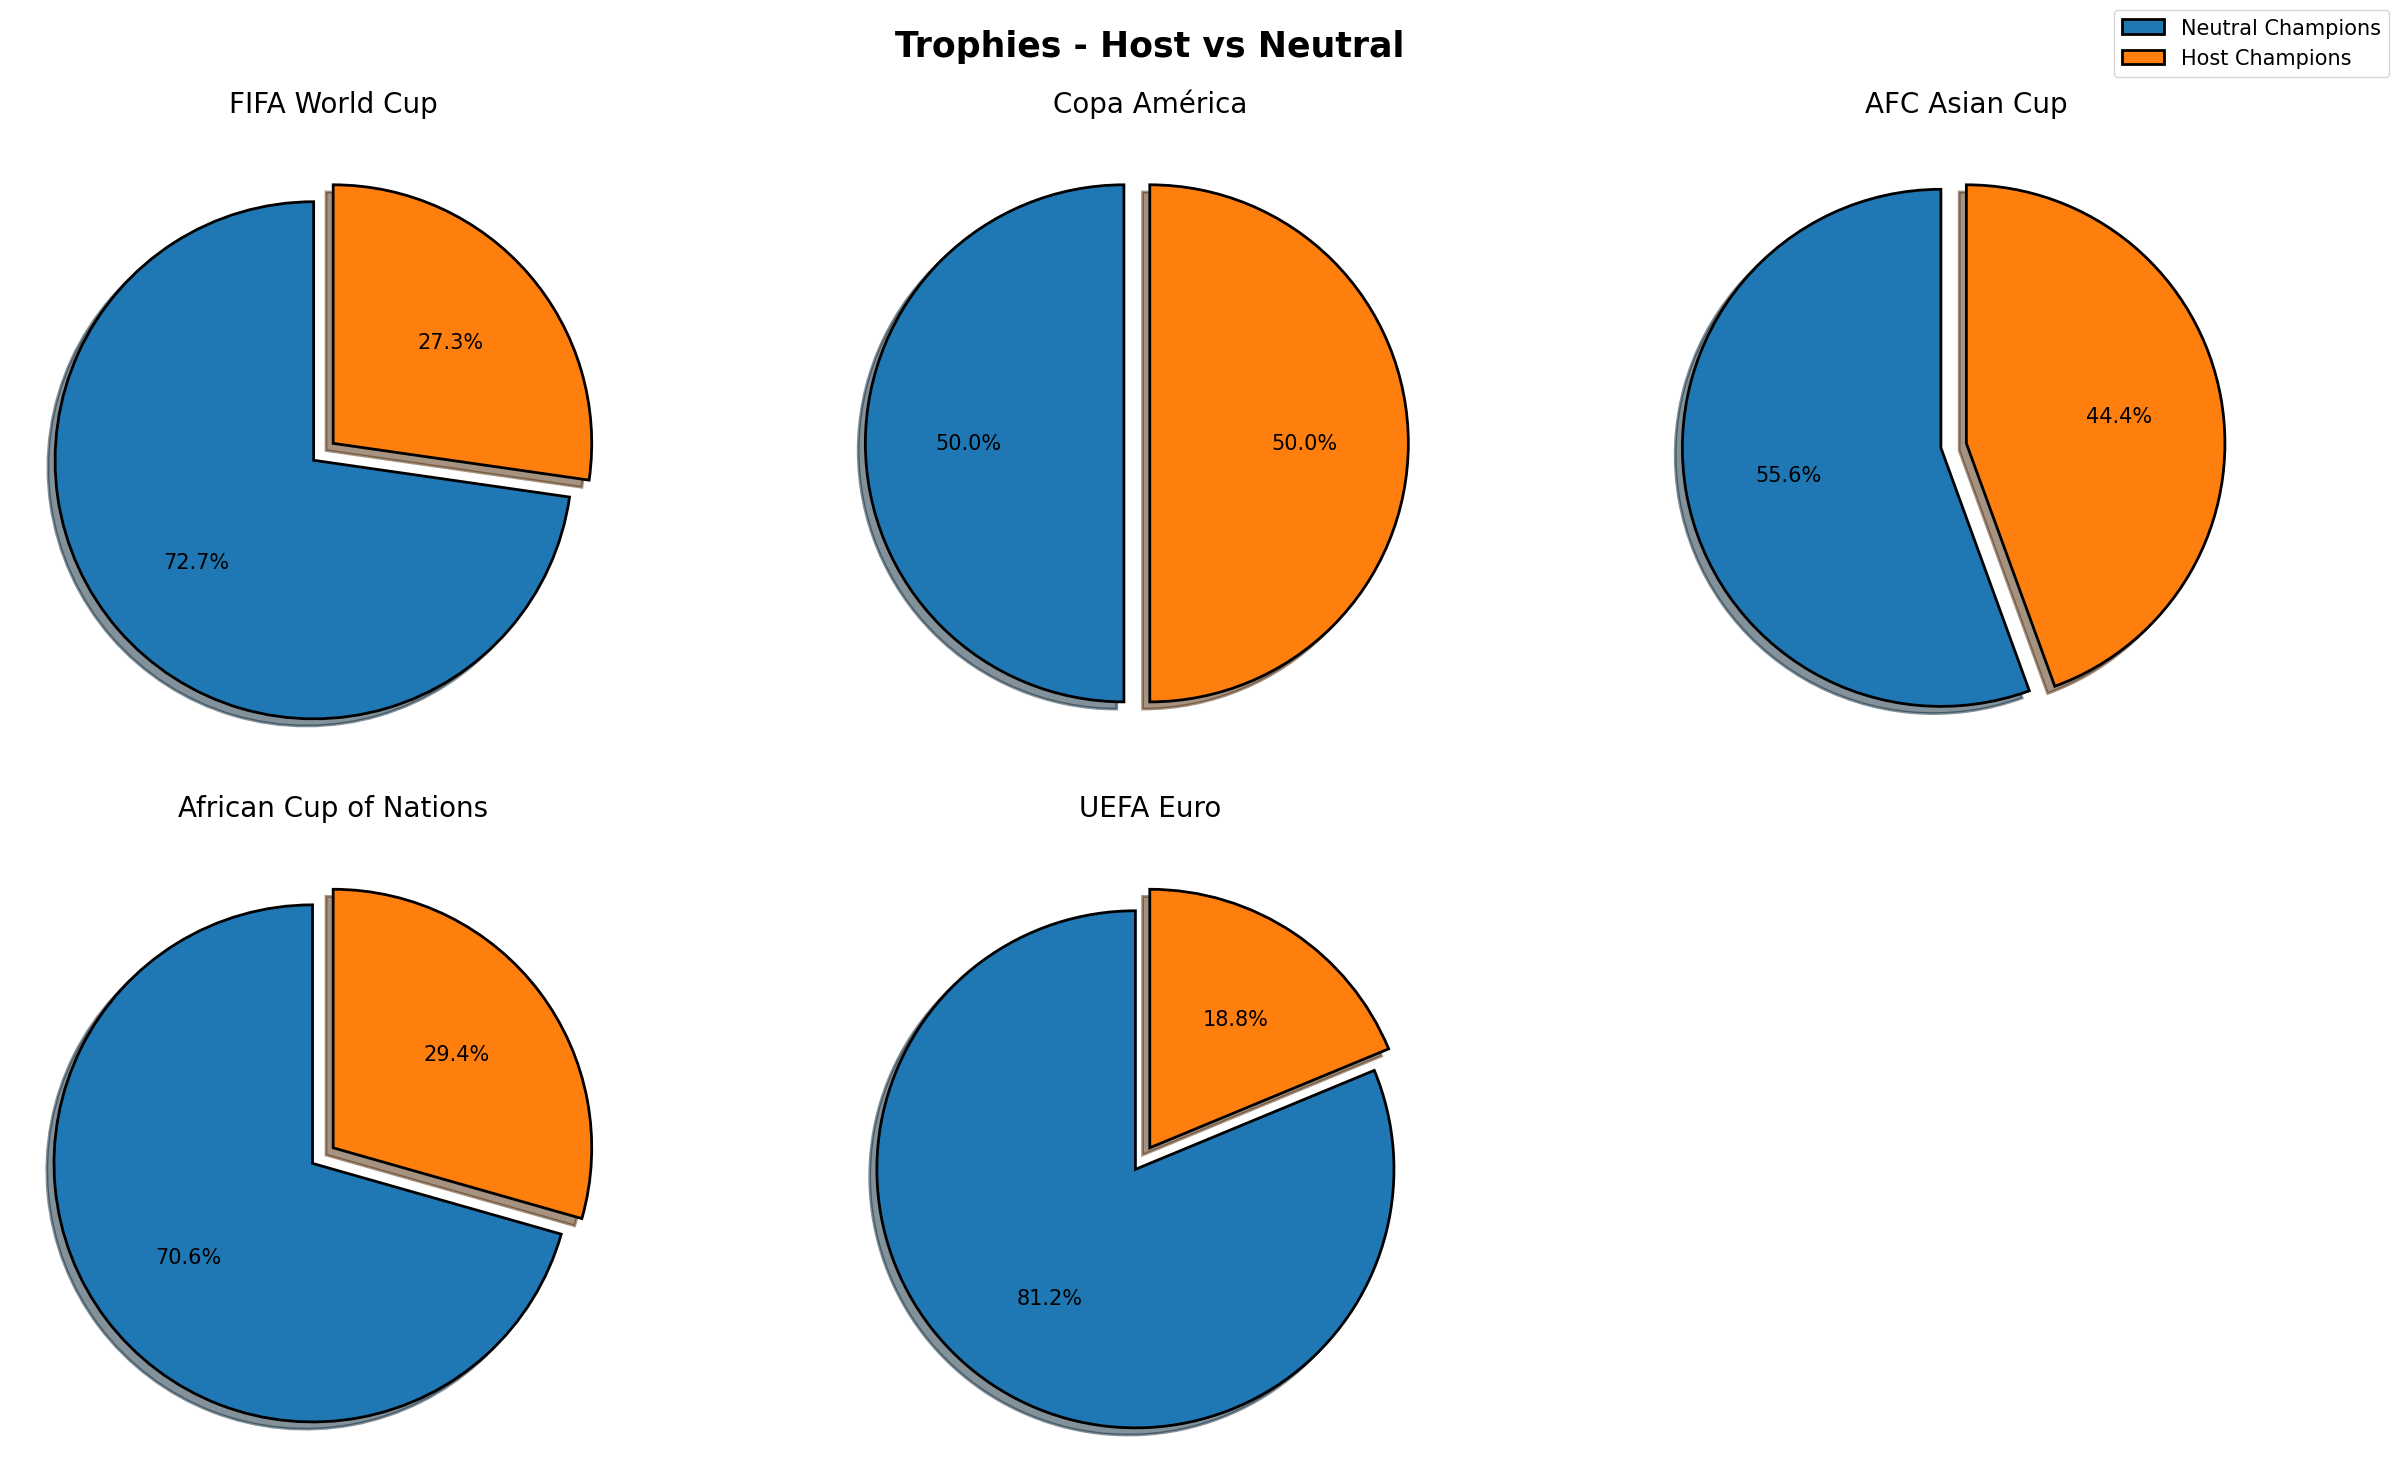

In [42]:
# Plotting pie charts to show the difference in success percentage between host countries and neutral countries
fig_hostvsneutral_trophies, axs = plt.subplots(2, 3, figsize=(25, 15))

axs[0, 0].pie(world_cup_champions_arr, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops=wp, textprops=tp, explode=ex)
axs[0, 1].pie(copa_america_champions_arr, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops=wp, textprops=tp, explode=ex)
axs[0, 2].pie(asian_cup_champions_arr, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops=wp, textprops=tp, explode=ex)
axs[1, 0].pie(afcon_champions_arr, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops=wp, textprops=tp, explode=ex)
axs[1, 1].pie(euros_champions_arr, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops=wp, textprops=tp, explode=ex)
axs[1,2].remove()  # This will remove the subplot in the second row and third column

# Create a common super legend to the right of the subplots
common_legend = fig_hostvsneutral_trophies.legend(['Neutral Champions', 'Host Champions'], loc='upper right', fontsize=15)

# Set titles for subplots
axs[0, 0].set_title('FIFA World Cup', fontsize=20)
axs[0, 1].set_title('Copa América', fontsize=20)
axs[0, 2].set_title('AFC Asian Cup', fontsize=20)
axs[1, 0].set_title('African Cup of Nations', fontsize=20)
axs[1, 1].set_title('UEFA Euro', fontsize=20)

# Add super title
plt.suptitle('Trophies - Host vs Neutral', fontweight='bold', fontsize=25)

# Adjust layout
fig_hostvsneutral_trophies.tight_layout(pad=2)

# setting face color/bg of the plot to white
fig_hostvsneutral_trophies.set_facecolor('white')

# Save the figure
# fig_hostvsneutral_trophies.savefig('Host vs Neutral success comparison.png')

Here we can see that **FIFA World Cup**, **African Cup of Nations** and **UEFA Euro** have a decent (but not so encouraging) win percentage whilst being the Home Team whereas in **Copa América** the Home Team seems to have a higher success rate.

# _Inferences and Conclusion_

We can conculde by saying that although being the Host Nation may hold an advantage, it doesn't necessarily guarantee 100% success. There is a lot of other data that can contribute to a team's result such as tactics, formation, team chemistry, etc.

# _References_

- The [*dataset*](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017) we used for our analysis was obtained from [*Kaggle*](https://www.kaggle.com/).
- To clean some of our data that we extracted from kaggle we cross-referenced it with the data available on Wikipedia.

# _Future Work_

For our next project we will be analysing _formations_ as they play a major role in setting up a team's tactics. We will be analysing how formations have evolved over the years and how they impact a team's performance.

<p align="center">
    <img src="https://soccernovo.com/wp-content/uploads/2022/12/Soccer-Formation.png" alt="Alt Text">
</p>